## 신경망에서 딥러닝으로

- 심층 신경망(Deep Neural Network, DNN)는 앞장에서 학습한 MLP(다층 퍼셉트론)에서 은닉층의 개수를 증가시킨 것<br><br>

- "deep"자체가 은닉층이 깊다는 것 의미<br><br>

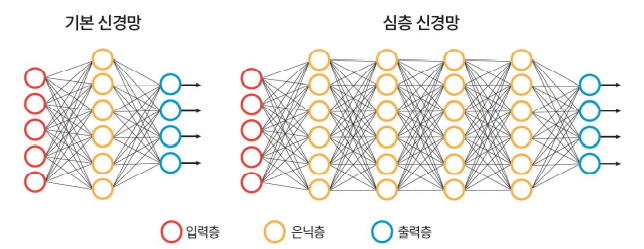

- **그래디언트 소멸 문제** : 은닉층이 많아지면 출력층에서 계산된 그래디언트가 역전파되다가 값이 점점 작아져 없어짐<br><br>

- 과잉 적합(over fitting)

- 퍼셉트론에서는 계단 함수(step function)를 활성화 함수로 사용하였지만, MLP에서는 다양한 비선형 함수들을 활성화 함수로 사용한다<br><br>

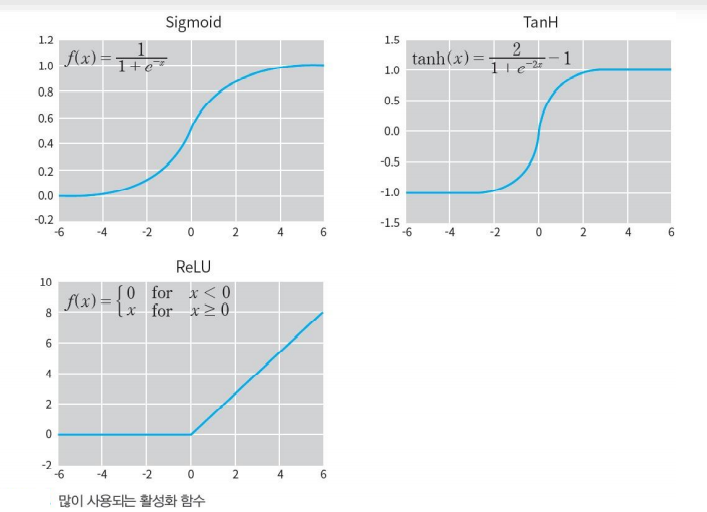

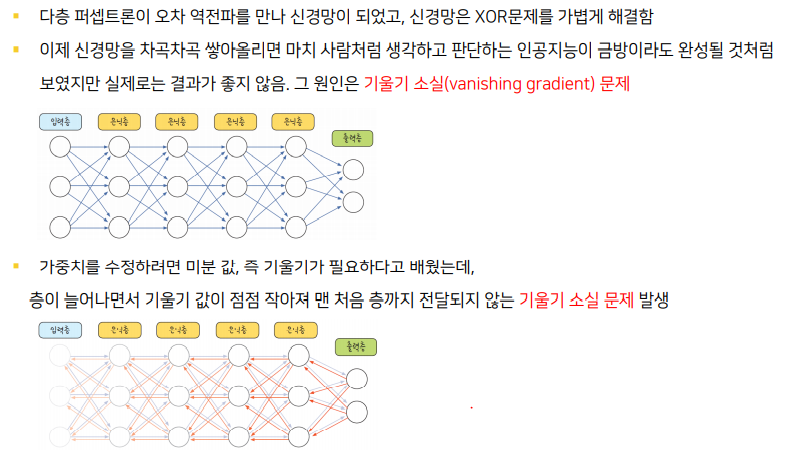

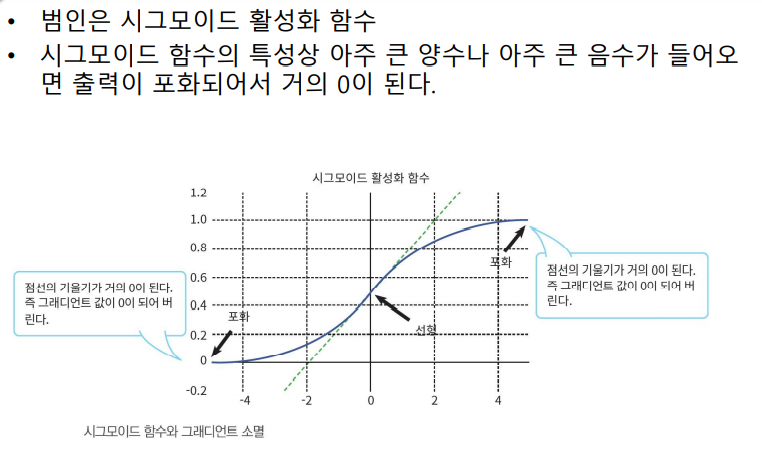

- 기울기 소실 문제가 발생하기 시작한 것은 활성화 함수로 사용된 시그모이드 함수의 특성 때문<br><br>

- 시그모이드 함수를 미분하면 최대치가 0.3임. 1보다 작으므로 계속 곱하다 보면 0에 가까워짐.따라서 여러 층을 거칠수록 기울기가 사라져 가중치를 수정하기가 어려워지는 것<br><br>

- 이를 대체하기 위해 활성화 함수를 시그모이드가 아닌 다른 함수들로 대체하기 시작<br><br>

- 하이퍼볼릭 탄젠트(tanh) 함수<br><br>
 - 미분한 값의 번위가 함께 확장되는 효과를 가져옴
 - 여전히 1보다 작은 값이 존재하므로 기울기 소실 문제 사라지지 않음<br><br>

- 렐루(ReLU)함수<br><br>
 - 시그모이드 함수의 대안으로 떠오르며 현재 가장 많이 사용되는 활성화 함수
 - 여러 은닉층을 거치며 곱해지더라도 맨 처음층까지 사라지지 않고 남아있을수 있음<br><br>
 
- 소프트 플러스(softplus)함수<br><br>
 - 이후 렐루의 0이되는 순간을 완화


- 경사 하강법은 정확하게 가중치를 찾아가지만, 한번 업데이트 할 때 마다 전체 데이터를 미분해야 하므로 계산량이 매우 많다는 단점 있음<br><br>

- 경사 하강법은 불 필요하게 많은 계산량은 속도를 느리게 할 뿐 아니라, 최적의 해를 찾기 전에 최적화 과정 멈출 수 있음<br><br>

- 확률적 경사 하강법(Stochastic Gradient Descent, SGD)<br><br>
 - 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터를 사용함
 - 일부 데이터를 사용하므로 더 빨리 그리고 자주 업데이트를 하는 것이 가능해짐
 - 속도가 빠르고 최적 해에 근사한 값을 찾아낸다는 장점 덕분에 경사 하강법의 대안으로 사용됨
 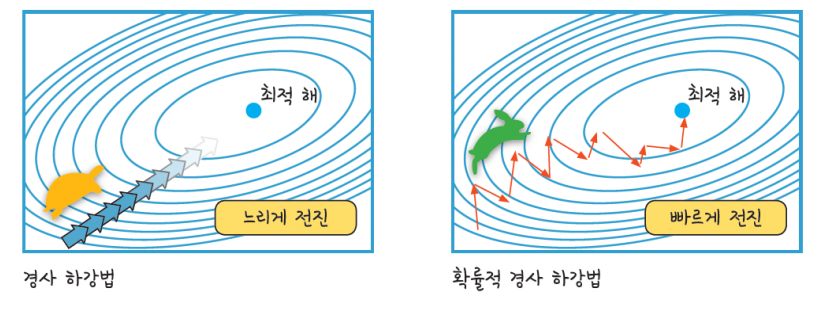

- **모멘텀**<br><br>

- 모멘텀(momentum)이란 단어는 ‘관성, 탄력, 가속도’라는 뜻<br><br>

- 모멘텀 SGD란 말 그대로 경사 하강법에 탄력을 더해 주는 것<br><br>

- 다시 말해서, 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 이를 통해 오차를 수정하기 전 바로 앞 수정 값과 방향(+, -)을 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법<br><br>

- 수정 방향이 양수(+) 방향으로 한 번, 음수(-) 방향으로한 번 지그재그로 일어나는 현상이 줄어들고, 이전 이동 값을 고려하여 일정 비율만큼만 다음 값을 결정하므로 관성의 효과를 낼 수 있음<br><br>

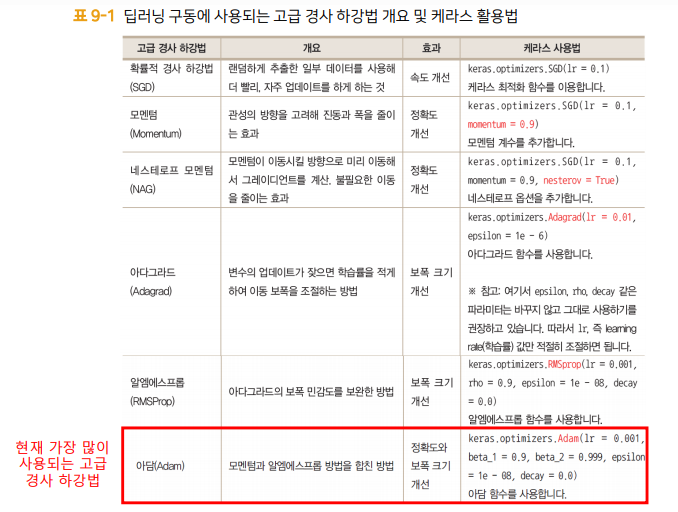

In [4]:
x = 10
learning_rate = 0.01
precision = 0.00001
max_iterations = 100

# 손실함수
loss_func = lambda x: (x-3) ** 2 + 10 # 49
# 그래디언트 정의 손실함수의 1차 미분값
gradient = lambda x: 2*x-6 # 14

# 그래디언트 강하법
for i in range(max_iterations):
    x = x -learning_rate * gradient(x)
    print('손실 함수값 (', x,") =", loss_func(x))
    
print("최소값 = ",x)

손실 함수값 ( 9.86 ) = 57.05959999999999
손실 함수값 ( 9.7228 ) = 55.19603983999999
손실 함수값 ( 9.588344 ) = 53.40627666233599
손실 함수값 ( 9.456577119999999 ) = 51.68738810650748
손실 함수값 ( 9.327445577599999 ) = 50.03656753748979
손실 함수값 ( 9.200896666048 ) = 48.45111946300519
손실 함수값 ( 9.076878732727039 ) = 46.92845513227018
손실 함수값 ( 8.955341158072498 ) = 45.46608830903228
손실 함수값 ( 8.836234334911047 ) = 44.061631211994595
손실 함수값 ( 8.719509648212826 ) = 42.7127906159996
손실 함수값 ( 8.60511945524857 ) = 41.41736410760602
손실 함수값 ( 8.493017066143599 ) = 40.17323648894484
손실 함수값 ( 8.383156724820727 ) = 38.97837632398262
손실 함수값 ( 8.275493590324313 ) = 37.830832621552915
손실 함수값 ( 8.169983718517827 ) = 36.728731649739416
손실 함수값 ( 8.06658404414747 ) = 35.67027387640974
손실 함수값 ( 7.965252363264521 ) = 34.65373103090391
손실 함수값 ( 7.865947315999231 ) = 33.67744328208012
손실 함수값 ( 7.768628369679246 ) = 32.73981652810974
손실 함수값 ( 7.673255802285661 ) = 31.839319793596598
손실 함수값 ( 7.579790686239948 ) = 30.97448272977017
손실 함수값

In [6]:
import tensorflow as tf

batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10 # 출력 클래스의 개수
epochs = 20 # 에포크의 개수

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))
model.summary()

sgd = tf.keras.optimizers.SGD(lr=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

# 학습을 수행한다. 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)

# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0994 - accuracy: 0.1601
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.3598
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.4818
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.5805
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.6475
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.6984
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.7298
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0529 - accuracy: 0.7602
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.7796
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.7954

- 입력층과 출력층 사이에 은닉층(hidden layer)을 가지고 있는 신경망을 다층 퍼셉트론(multilayer perceptron: MLP)이라고 부른다.<br><br>

- MLP를 학습시키기 위하여 역전파 알고리즘(back-propagation)이 재발견되었다. 이 알고리즘이 지금까지도 신경망 학습 알고리즘의 근간이 되고 있다. <br><br>

- 역전파 알고리즘은 입력이 주어지면 순방향으로 계산하여 출력을 계산한 후에 실제 출력과 우리가 원하는출력 간의 오차를 계산한다. 이 오차를 역방향으로 전파하면서 오차를 줄이는 방향으로 가중치를 변경한다. <br><br>